# Analysis of World Population from 1960 to 2020
![alt](img1.jpeg)

In [2]:
#IMPORT LIBRARIES:

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("world-population.csv")
df=data.copy()
df.head()   

,country,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Rank
0,Afghanistan,2020,38928346,2.33 %,886592,-62920.0,18.4,4.56,60,25.4 %,9904337,0.50 %,7794798739,37
1,Afghanistan,2019,38041754,2.34 %,869833,-62920.0,17.4,5.26,58,25.2 %,9582625,0.49 %,7713468100,37
2,Afghanistan,2018,37171921,2.41 %,875808,-62920.0,17.4,5.26,57,24.9 %,9273302,0.49 %,7631091040,38
3,Afghanistan,2017,36296113,2.58 %,913081,-62920.0,17.4,5.26,56,24.7 %,8971472,0.48 %,7547858925,39
4,Afghanistan,2016,35383032,2.82 %,969429,-62920.0,17.4,5.26,54,24.5 %,8670939,0.47 %,7464022049,39


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4196 entries, 0 to 4195
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        4196 non-null   object 
 1   Year                           4196 non-null   int64  
 2   Population                     4196 non-null   int64  
 3   Yearly %   Change              4196 non-null   object 
 4   Yearly  Change                 4196 non-null   int64  
 5   Migrants (net)                 3618 non-null   float64
 6   Median Age                     3618 non-null   float64
 7   Fertility Rate                 3618 non-null   float64
 8   Density (P/Km²)                4196 non-null   int64  
 9   Urban  Pop %                   4196 non-null   object 
 10  Urban Population               4196 non-null   object 
 11  Country's Share of  World Pop  4196 non-null   object 
 12  World Population               4196 non-null   i

In [5]:
#statistical summary
df.describe()

,Year,Population,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),World Population,Rank
count,4196.000000,4.196000e+03,4.196000e+03,3.618000e+03,3618.000000,3618.000000,4196.000000,4.196000e+03,4196.000000
mean,1993.957340,2.442938e+07,3.297777e+05,-4.818684e+00,25.474986,3.887186,343.500953,5.677487e+09,117.185653
std,21.686153,1.067293e+08,1.334212e+06,1.060564e+05,8.218262,1.985077,1751.259611,1.732760e+09,67.506229
min,1955.000000,6.440000e+02,-6.730240e+05,-1.077397e+06,14.400000,0.850000,0.000000,2.773020e+09,1.000000
25%,1975.000000,2.855070e+05,1.324250e+03,-1.228375e+04,18.500000,2.090000,21.000000,4.079481e+09,59.000000
50%,1995.000000,3.685932e+06,3.892450e+04,-9.000000e+02,22.750000,3.400000,71.000000,5.744213e+09,117.000000
75%,2016.000000,1.305111e+07,2.075432e+05,5.000000e+03,31.600000,5.740000,171.000000,7.464022e+09,175.000000
max,2020.000000,1.439324e+09,2.067648e+07,1.771991e+06,48.400000,8.800000,26150.000000,7.794799e+09,235.000000


In [6]:
# customizing columns:

df.columns=df.columns.str.replace(" ","")
df.rename(columns={"PopulationShare":"WorldPopulationShare"},inplace=True)
df.head()

,country,Year,Population,Yearly%Change,YearlyChange,Migrants(net),MedianAge,FertilityRate,Density(P/Km²),UrbanPop%,UrbanPopulation,Country'sShareofWorldPop,WorldPopulation,Rank
0,Afghanistan,2020,38928346,2.33 %,886592,-62920.0,18.4,4.56,60,25.4 %,9904337,0.50 %,7794798739,37
1,Afghanistan,2019,38041754,2.34 %,869833,-62920.0,17.4,5.26,58,25.2 %,9582625,0.49 %,7713468100,37
2,Afghanistan,2018,37171921,2.41 %,875808,-62920.0,17.4,5.26,57,24.9 %,9273302,0.49 %,7631091040,38
3,Afghanistan,2017,36296113,2.58 %,913081,-62920.0,17.4,5.26,56,24.7 %,8971472,0.48 %,7547858925,39
4,Afghanistan,2016,35383032,2.82 %,969429,-62920.0,17.4,5.26,54,24.5 %,8670939,0.47 %,7464022049,39


In [7]:
#check missing values
df.isnull().sum()

country                       0
Year                          0
Population                    0
Yearly%Change                 0
YearlyChange                  0
Migrants(net)               578
MedianAge                   578
FertilityRate               578
Density(P/Km²)                0
UrbanPop%                     0
UrbanPopulation               0
Country'sShareofWorldPop      0
WorldPopulation               0
Rank                          0
dtype: int64

In [8]:
#EDA:

#correlation matrix

corr=df.corr()

px.imshow(corr,labels=dict(color="Correlation Coefficient"),title="Correlation Matrix",width=700,height=700,color_continuous_scale="Viridis",
          template="plotly_dark")


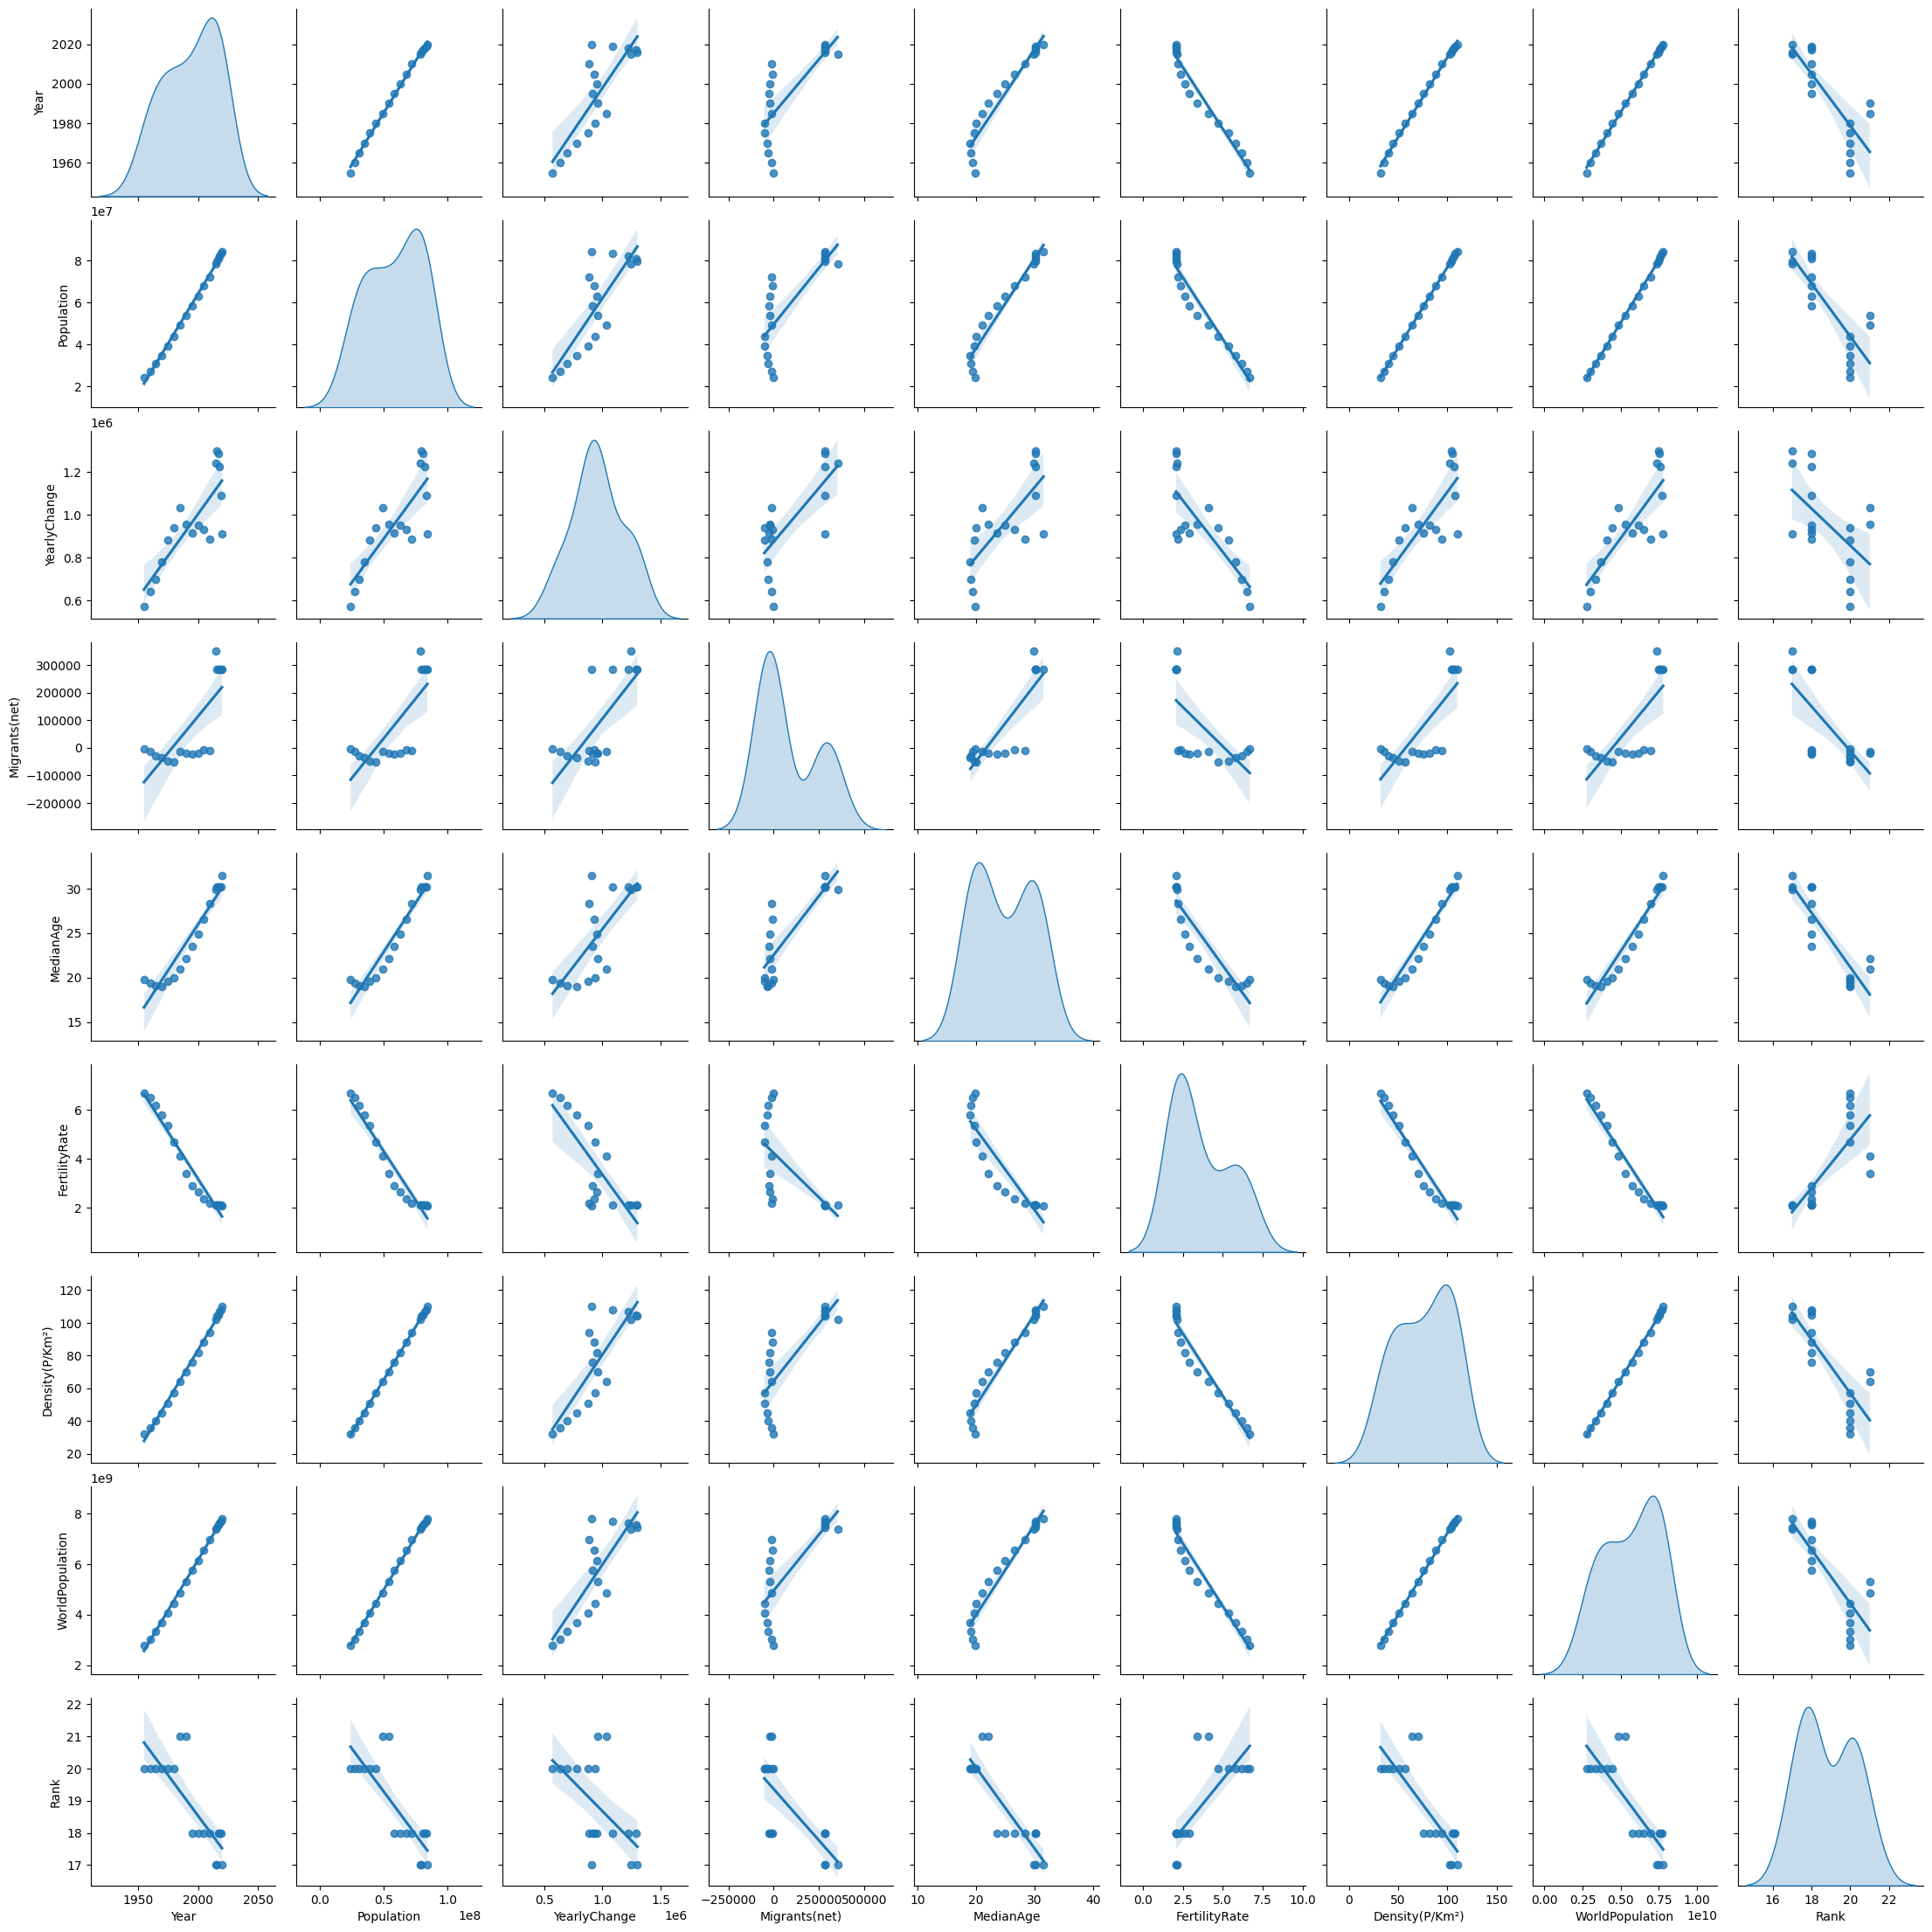

In [9]:
#distrubtion of all variables for Turkey
tr=df[df["country"]=="Turkey"]

sns.pairplot(tr,kind="reg",diag_kind="kde",palette="viridis")

In [10]:
# top 10 countries with highest population in their most recent year

pp=df.groupby("country")["Population"].max().sort_values(ascending=False).reset_index()
px.pie(pp,values="Population",names="country",title="Top 10 Countries with Highest Population",template="plotly_dark")

px.scatter_geo(pp,locations="country",locationmode="country names",color="country",hover_name="country",size="Population",projection="natural earth",
               title="Population of Countries",template="plotly_dark",width=1000,height=700,size_max=35)


In [11]:
# top 10 countries population change between 1960 and 2019s
pp=df.groupby("country")["Population"].max().sort_values(ascending=False).head(10).reset_index()
for i in pp["country"]:
    fig=px.line(df[df["country"]==i],x="Year",y="Population",title=i,template="plotly_dark")
    fig.show()

In [12]:
# top 10 countries with highest and lowest population density (for over 1 million population)
pp=df[df["Population"]>1000000].groupby("country")["Population"].max().sort_values(ascending=False).head(10).reset_index()
pp1=df[df["Population"]>1000000].groupby("country")["Population"].max().sort_values(ascending=True).head(10).reset_index()

fig = px.scatter(pp, y="Population", x="country", color="country",size="Population", hover_data=['country'],
 size_max=45,template="plotly_dark",title="Top 10 Countries with Highest Population")
fig.show()
fig1 = px.scatter(pp1, y="Population", x="country", color="country",size="Population", hover_data=['country'],
 size_max=45,template="plotly_dark",title="Top 10 Countries with Lowest Population")
fig1.show()

In [13]:
#top 10 countries with highest and lowest yearly population change

chn=df[df["Population"]>1000000].groupby("country")["YearlyChange"].max().sort_values(ascending=False).head(10).reset_index()
chn1=df[df["Population"]>1000000].groupby("country")["YearlyChange"].max().sort_values(ascending=True).head(20).reset_index()

a=px.bar(chn,x="country",y="YearlyChange",color="country",template="plotly_dark",title="Top 10 Countries with Highest Yearly Population Change",
       labels=dict(country="Country",YearlyChange="Yearly Population Change"))
a.show()
a1=px.bar(chn1,x="country",y="YearlyChange",color="country",template="plotly_dark",title="Top 10 Countries with Lowest Yearly Population Change",
       labels=dict(country="Country",YearlyChange="Yearly Population Change"))
a1.show()

In [14]:
# top 10 countries with highest and lowest fertility rate

frt=df.groupby("country")["FertilityRate"].max().sort_values(ascending=False).head(10).reset_index()
frt1=df.groupby("country")["FertilityRate"].max().sort_values(ascending=True).head(10).reset_index()

fig=px.scatter(frt,x="country",y="FertilityRate",color="country",template="plotly_dark",title="Top 10 Countries with Highest Fertility Rate",
           size="FertilityRate",size_max=45,labels=dict(country="Country",FertilityRate="Fertility Rate"))
fig.show()
fig1=px.scatter(frt1,x="country",y="FertilityRate",color="country",template="plotly_dark",title="Top 10 Countries with Lowest Fertility Rate",
           size="FertilityRate",size_max=45,labels=dict(country="Country",FertilityRate="Fertility Rate"))
fig1.show()

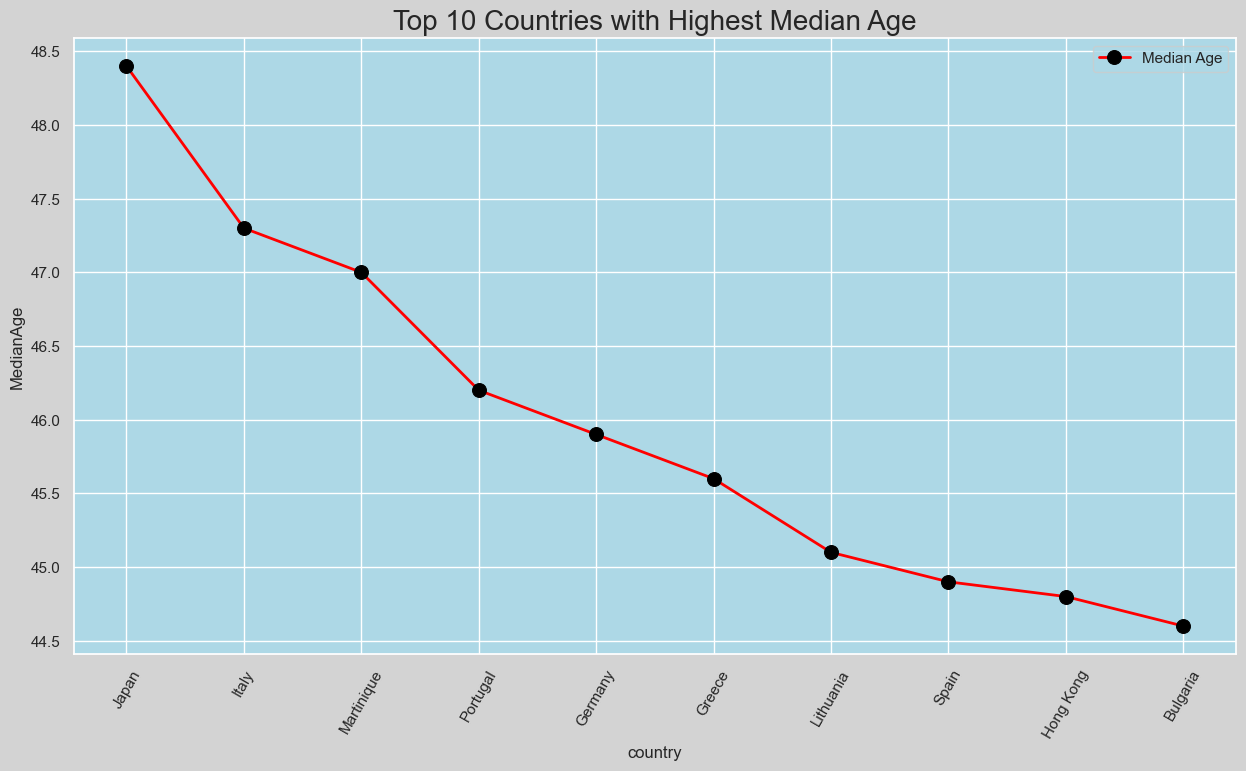

<Axes: title={'center': 'Top 10 Countries with Lowest Median Age'}, xlabel='country', ylabel='MedianAge'>

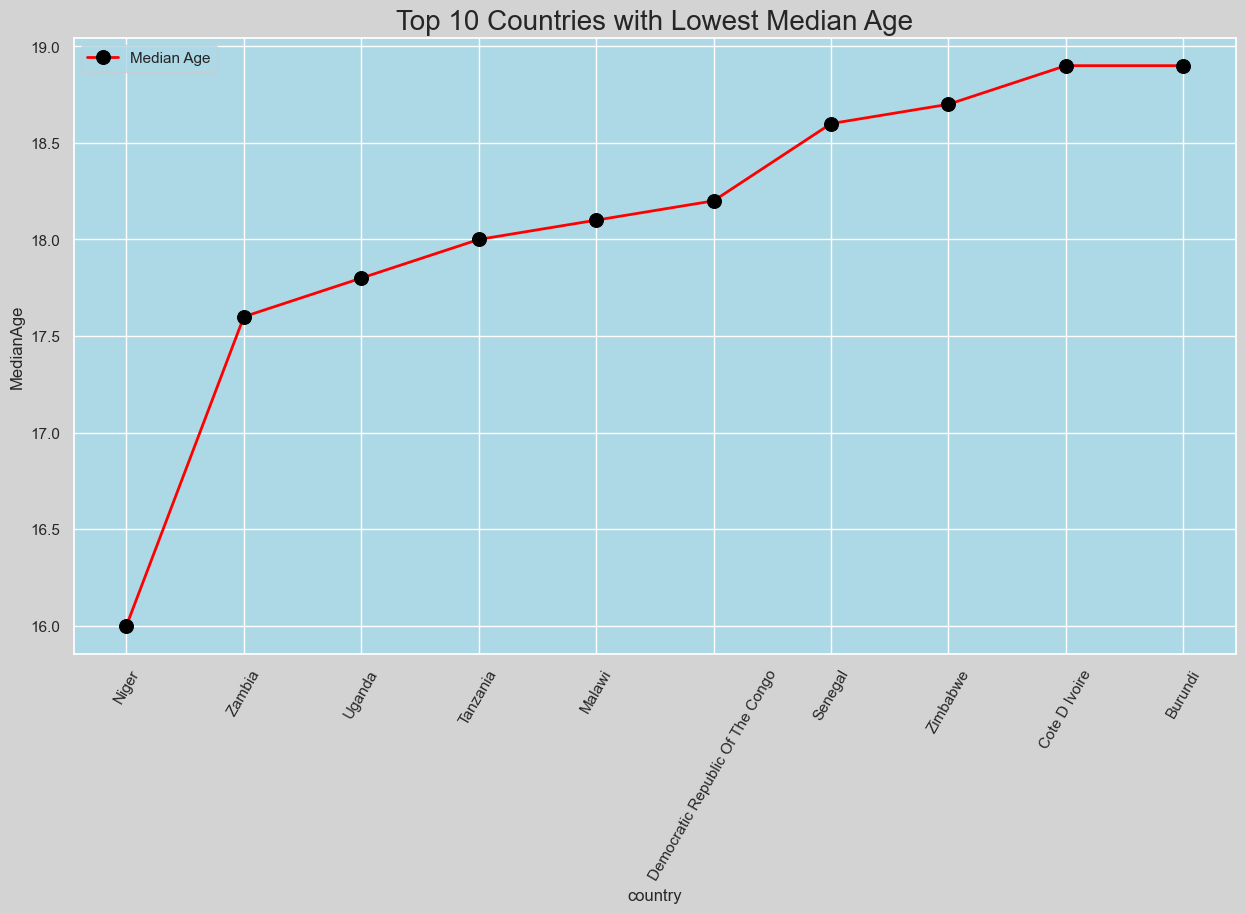

In [15]:
# top 10 countries with highest median age

age=df.groupby("country")["MedianAge"].max().sort_values(ascending=False).head(10).reset_index()

age1=df.groupby("country")["MedianAge"].max().sort_values(ascending=True).head(10).reset_index()

sns.set_style("darkgrid")
sns.set_context("paper")
sns.set_color_codes("pastel")
sns.set(rc={'figure.figsize':(15,8)})
sns.set(rc={'axes.facecolor':"lightblue", 'figure.facecolor':'lightgrey'})
plt.xticks(rotation=60)
plt.title("Top 10 Countries with Highest Median Age",fontsize=20)
sns.lineplot(data=age,x="country",y="MedianAge",color="red",marker="o",label="Median Age",linewidth=2,markersize=10,markerfacecolor="black",markeredgecolor="black")
plt.show()
plt.xticks(rotation=60)
plt.title("Top 10 Countries with Lowest Median Age",fontsize=20)
sns.lineplot(data=age1,x="country",y="MedianAge",color="red",marker="o",label="Median Age",linewidth=2,markersize=10,markerfacecolor="black",markeredgecolor="black")



In [16]:
#detecting outliers

clm=df[["Population","YearlyChange","Migrants(net)","FertilityRate","MedianAge","WorldPopulation"]]

for i in clm:
    fig=px.box(df,y=i,title=i,template="plotly_dark",labels=dict(value=i),width=700,height=700)
    fig.show()
